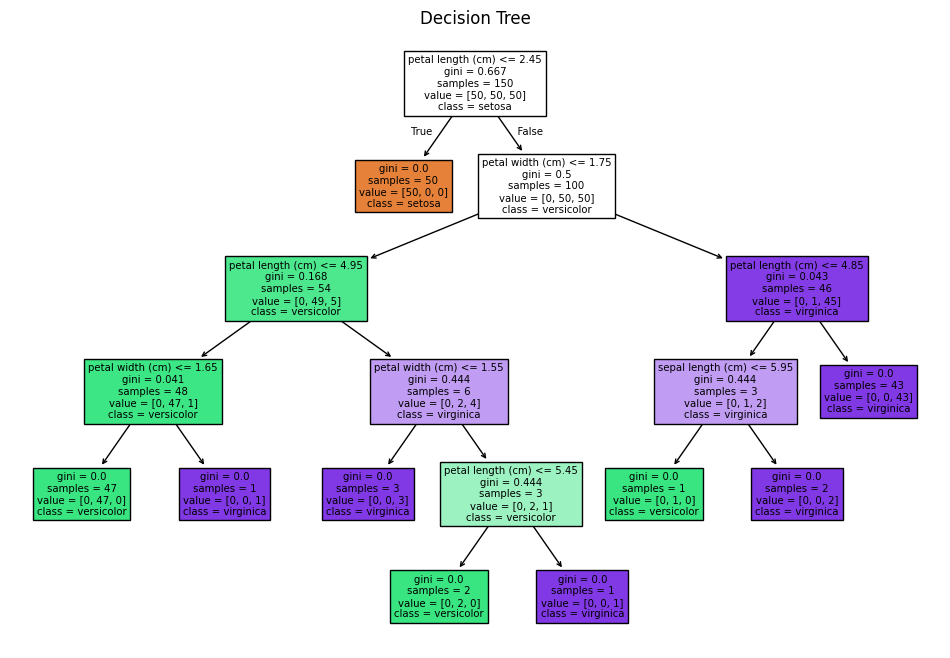

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample dataset
data = load_iris()
X, y = data.data, data.target

# Train decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without depth limit
dt_unpruned = DecisionTreeClassifier(random_state=42)
dt_unpruned.fit(X_train, y_train)
print("Unpruned Accuracy:", accuracy_score(y_test, dt_unpruned.predict(X_test)))

# With depth limit
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
print("Pruned Accuracy (max_depth=3):", accuracy_score(y_test, dt_pruned.predict(X_test)))


Unpruned Accuracy: 1.0
Pruned Accuracy (max_depth=3): 1.0


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compare accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Accuracy: 1.0


In [5]:
import pandas as pd

# Get importances
importances = rf.feature_importances_
feature_names = data.feature_names

# Create and sort dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display
print(importance_df)


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


In [6]:
from sklearn.model_selection import cross_val_score

# Cross-validation for decision tree
dt_scores = cross_val_score(dt_pruned, X, y, cv=5)
print("Decision Tree CV Accuracy: ", dt_scores.mean())

# Cross-validation for random forest
rf_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy: ", rf_scores.mean())


Decision Tree CV Accuracy:  0.9733333333333334
Random Forest CV Accuracy:  0.9666666666666668
